## Abrir un archivo DICOM
El siguiente código extrae la matrix de píxeles de un archivo dicom, y genera la imagen en escala de grises.
Lo hemos realizado  con dos médotos


### Primer Método

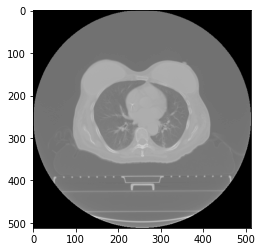

In [134]:
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np

# specify your image path
image_path = 'l'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)


def get_pixel_hu(scan):
    image = scan.pixel_array
    image[image == -2000] = 0
    intercept = scan.RescaleIntercept
    slope = scan.RescaleSlope
    if slope != 1:
        image = slope * image
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

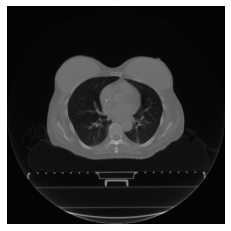

In [136]:
get_pixel_hu(ds)
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.axis('off')
plt.savefig('hola.png')

### Segundo Método

In [141]:
import png
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np

# specify your image path

image_path = 'l'
ds = dicom.dcmread(image_path)
ds = ds.pixel_array
ds_re = ds[50:390,75:435]
shape = ds_re.shape 
image_2d = ds_re.astype(float)
# Combirtiendo a escala de grises
image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0
# Convertir a enteros sin signo
image_2d_scaled = np.uint8(image_2d_scaled)
f = open('/home/jenn/Documentos/tesis/Tesis_latex/Tesis/Capitulos/img/ejemploCT.png', 'wb')      # binary mode is important
w = png.Writer(shape[1], shape[0], greyscale=True)
w.write(f, image_2d_scaled)
f.close()  